# WASP-18

Has TTVs...gotta be a bit careful.

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
name = 'WASP-18'

In [3]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [4]:
obs = om.Observation.from_files(fnames)

In [5]:
obs

WASP-18 [8 Visits]

In [6]:
clc = lk.search_lightcurve(name, author='SPOC', exptime=120).download_all().stitch().remove_nans()
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

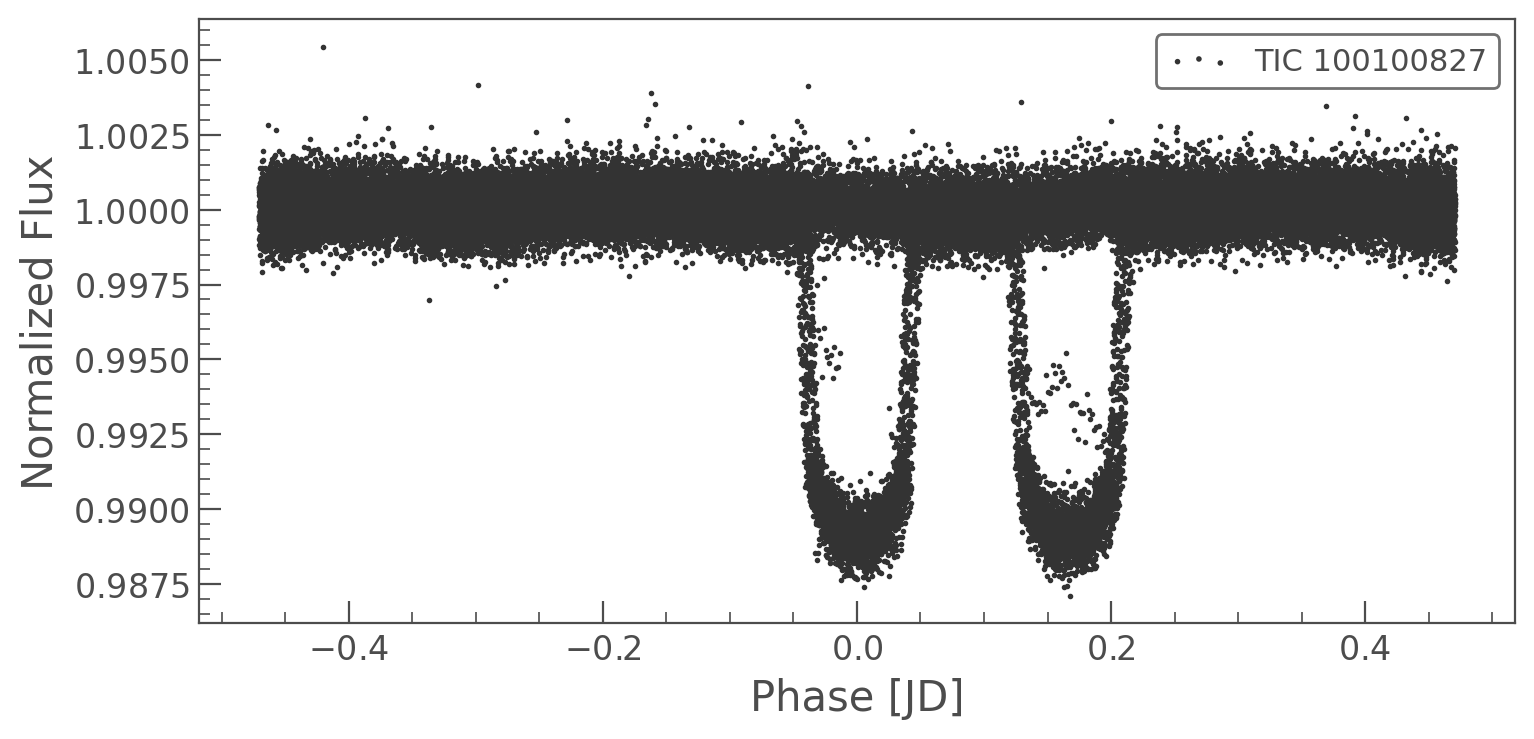

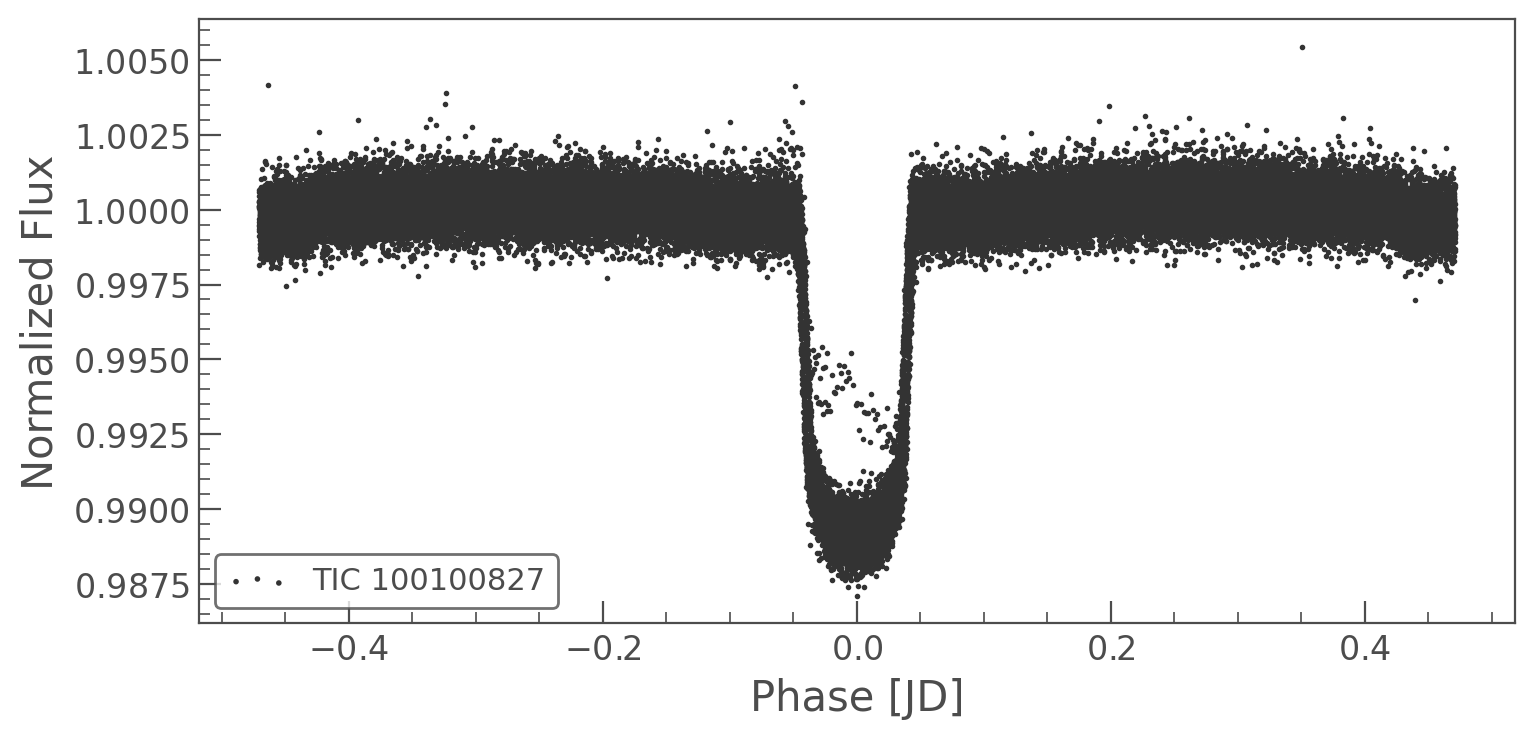

In [7]:
clc.fold(obs.period, obs.t0 - 2457000).scatter()

bls = clc.to_periodogram('bls', minimum_period=obs.period * 0.99, maximum_period=obs.period * 1.01, duration=obs.duration/24, frequency_factor=10)
obs.period, obs.t0 = bls.period_at_max_power.value, bls.transit_time_at_max_power.value + 2457000

clc.fold(obs.period, obs.t0 - 2457000).scatter()


In [8]:
obs.fit_transit(fit_t0=True, fit_period=True, fit_inc=False)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

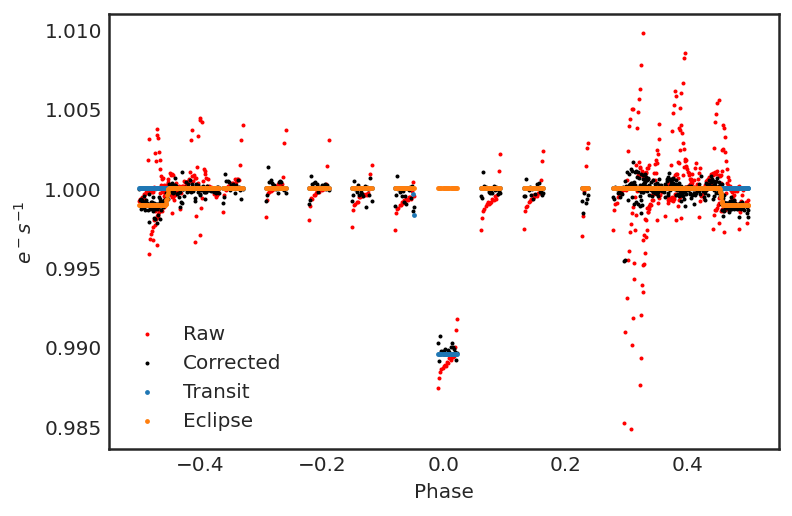

In [9]:
obs.plot()

In [10]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/8 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  12%|█▎        | 1/8 [00:27<03:09, 27.06s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 2/8 [00:52<02:38, 26.37s/it]

Fitting Transit/Eclipse Model:  38%|███▊      | 3/8 [01:18<02:09, 25.96s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 4/8 [03:55<05:10, 77.69s/it]

Fitting Transit/Eclipse Model:  62%|██████▎   | 5/8 [04:22<02:57, 59.27s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 6/8 [04:42<01:32, 46.11s/it]

Fitting Transit/Eclipse Model:  88%|████████▊ | 7/8 [05:07<00:39, 39.12s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [07:25<00:00, 70.50s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [07:25<00:00, 55.63s/it]

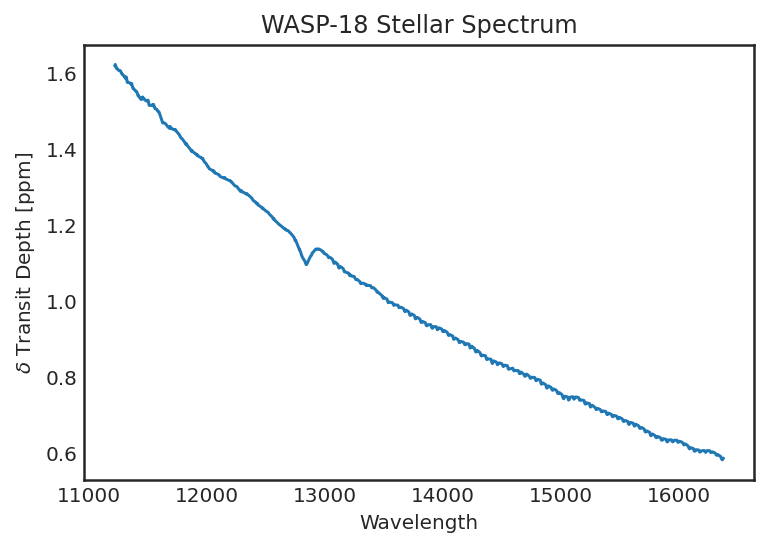

In [11]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

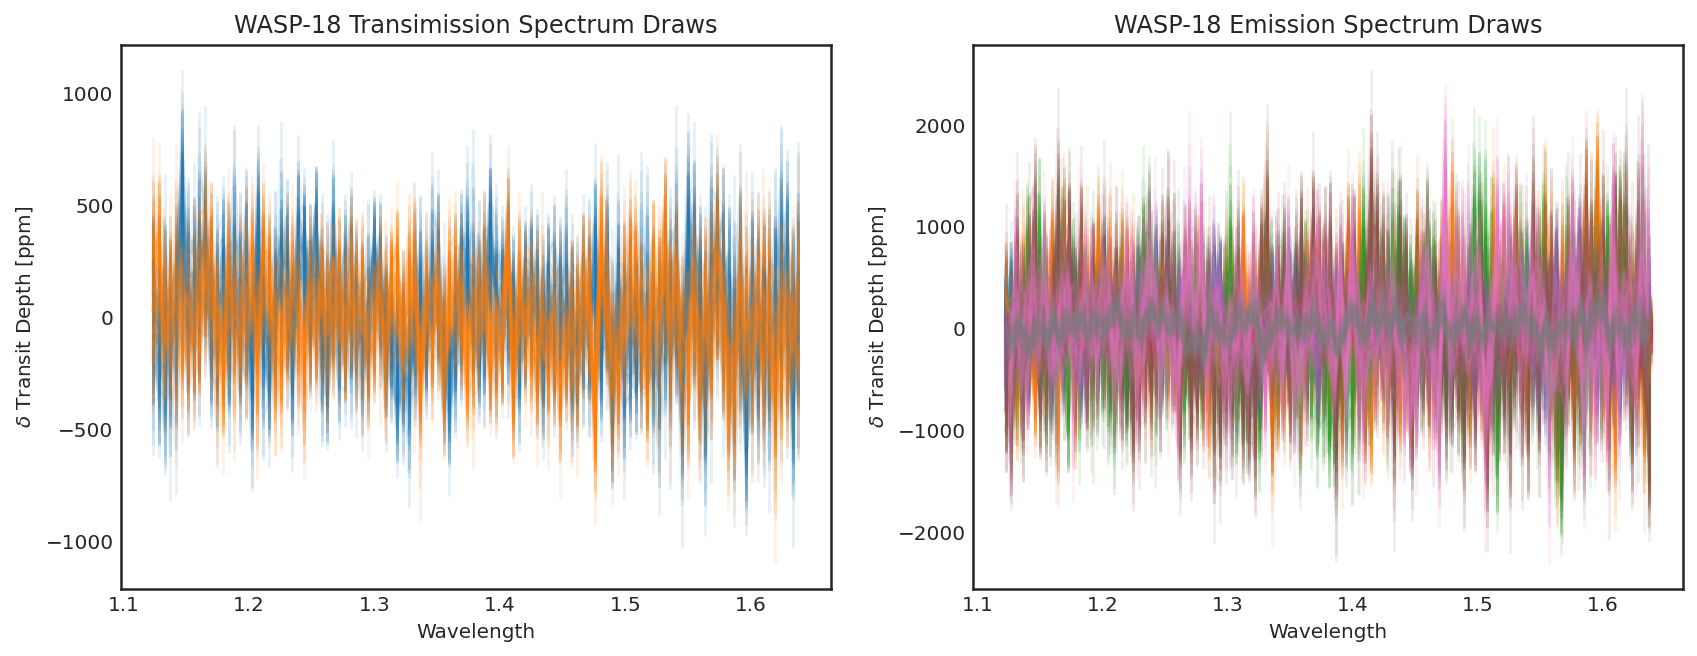

In [12]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

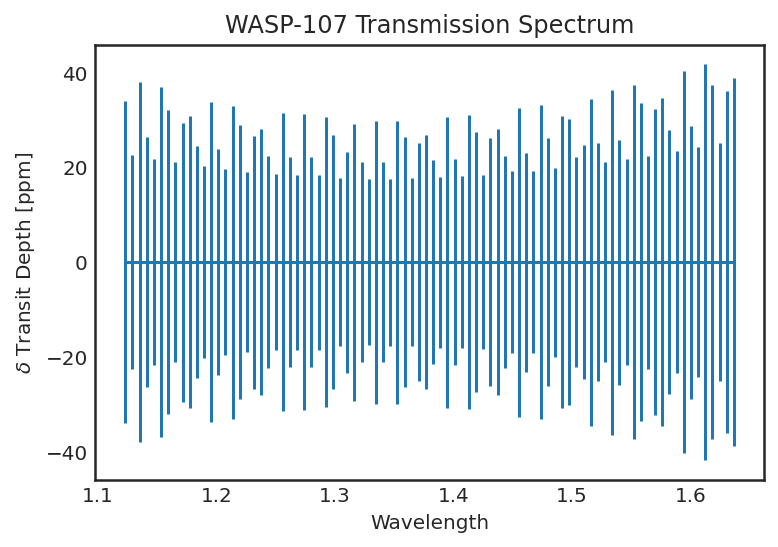

In [13]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [14]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

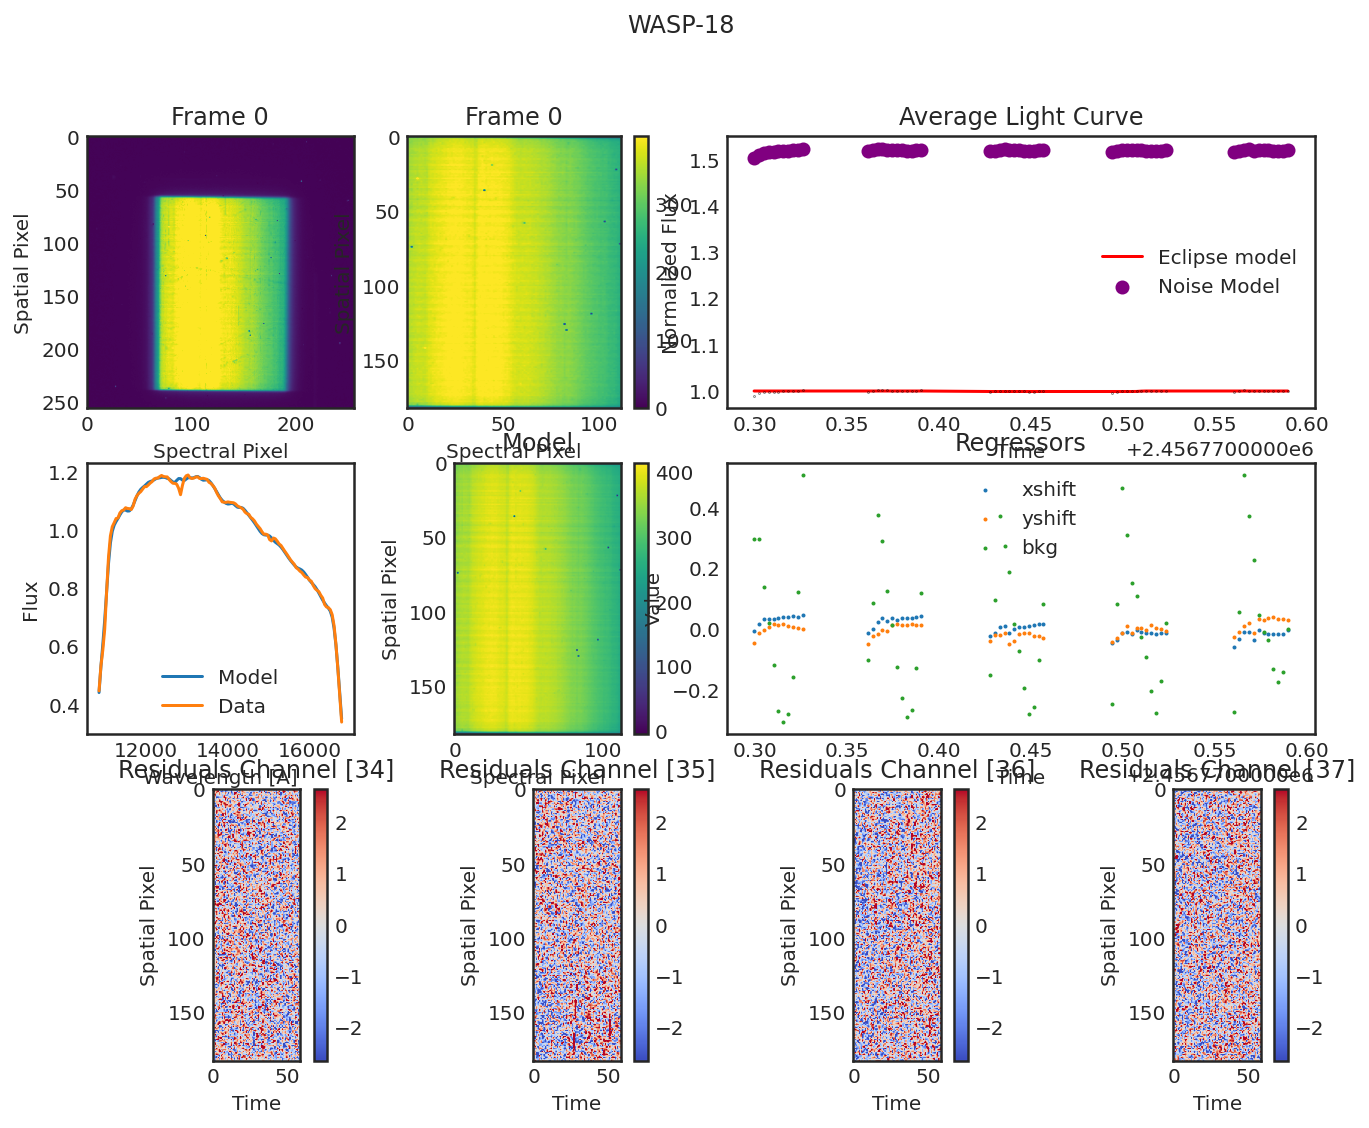

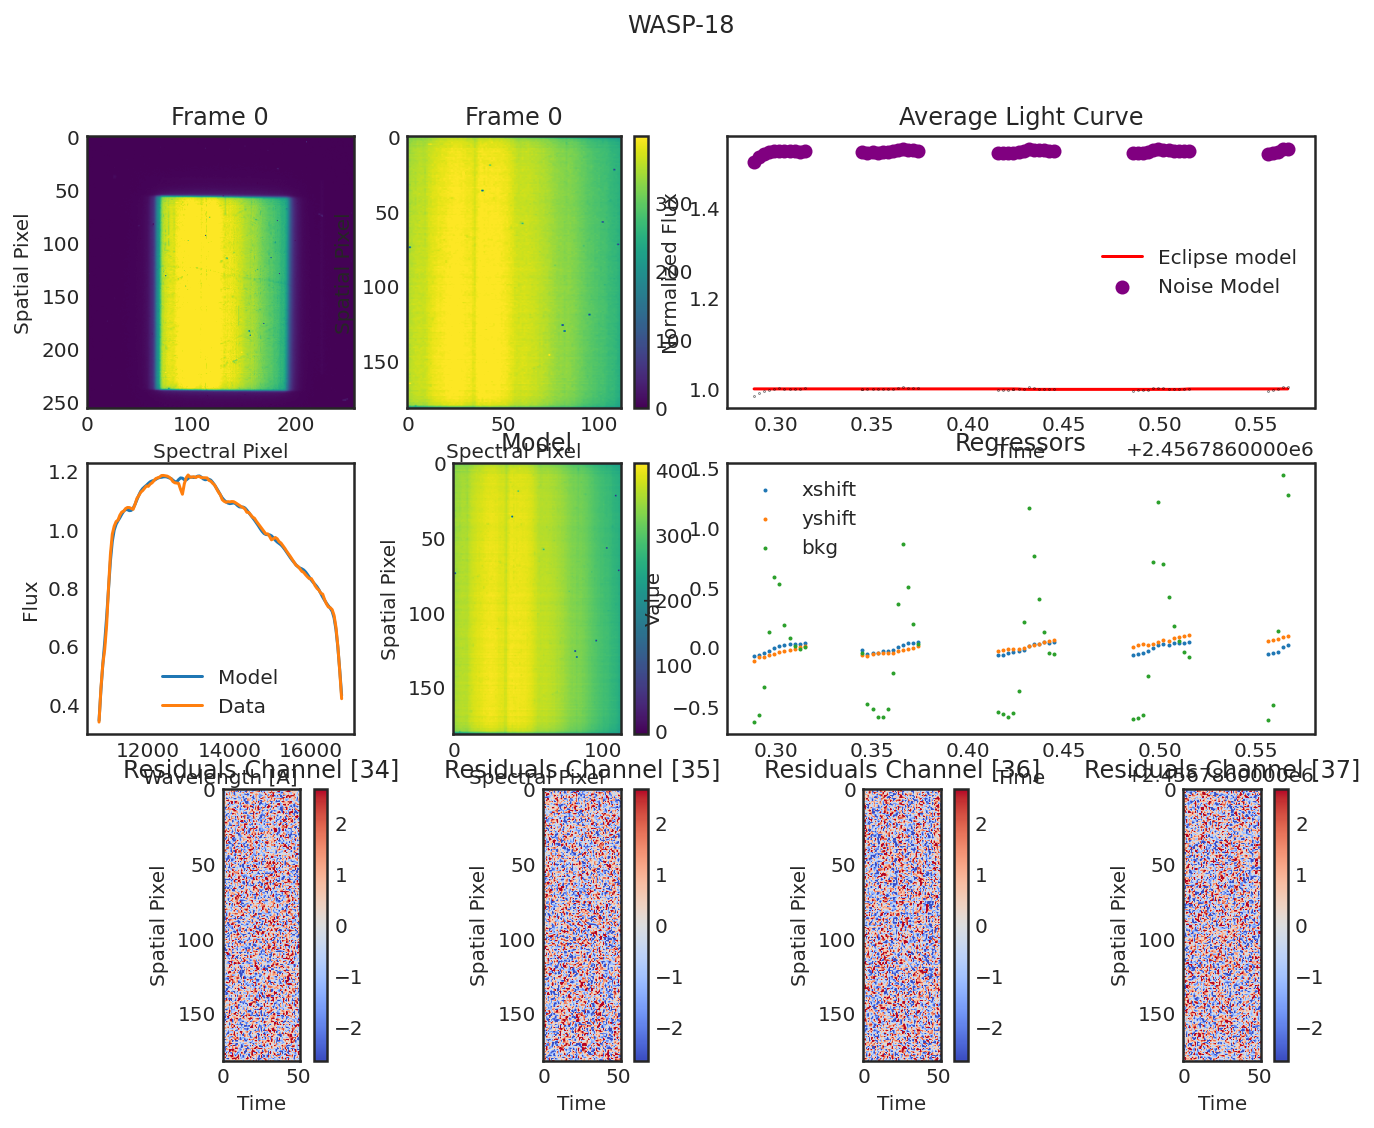

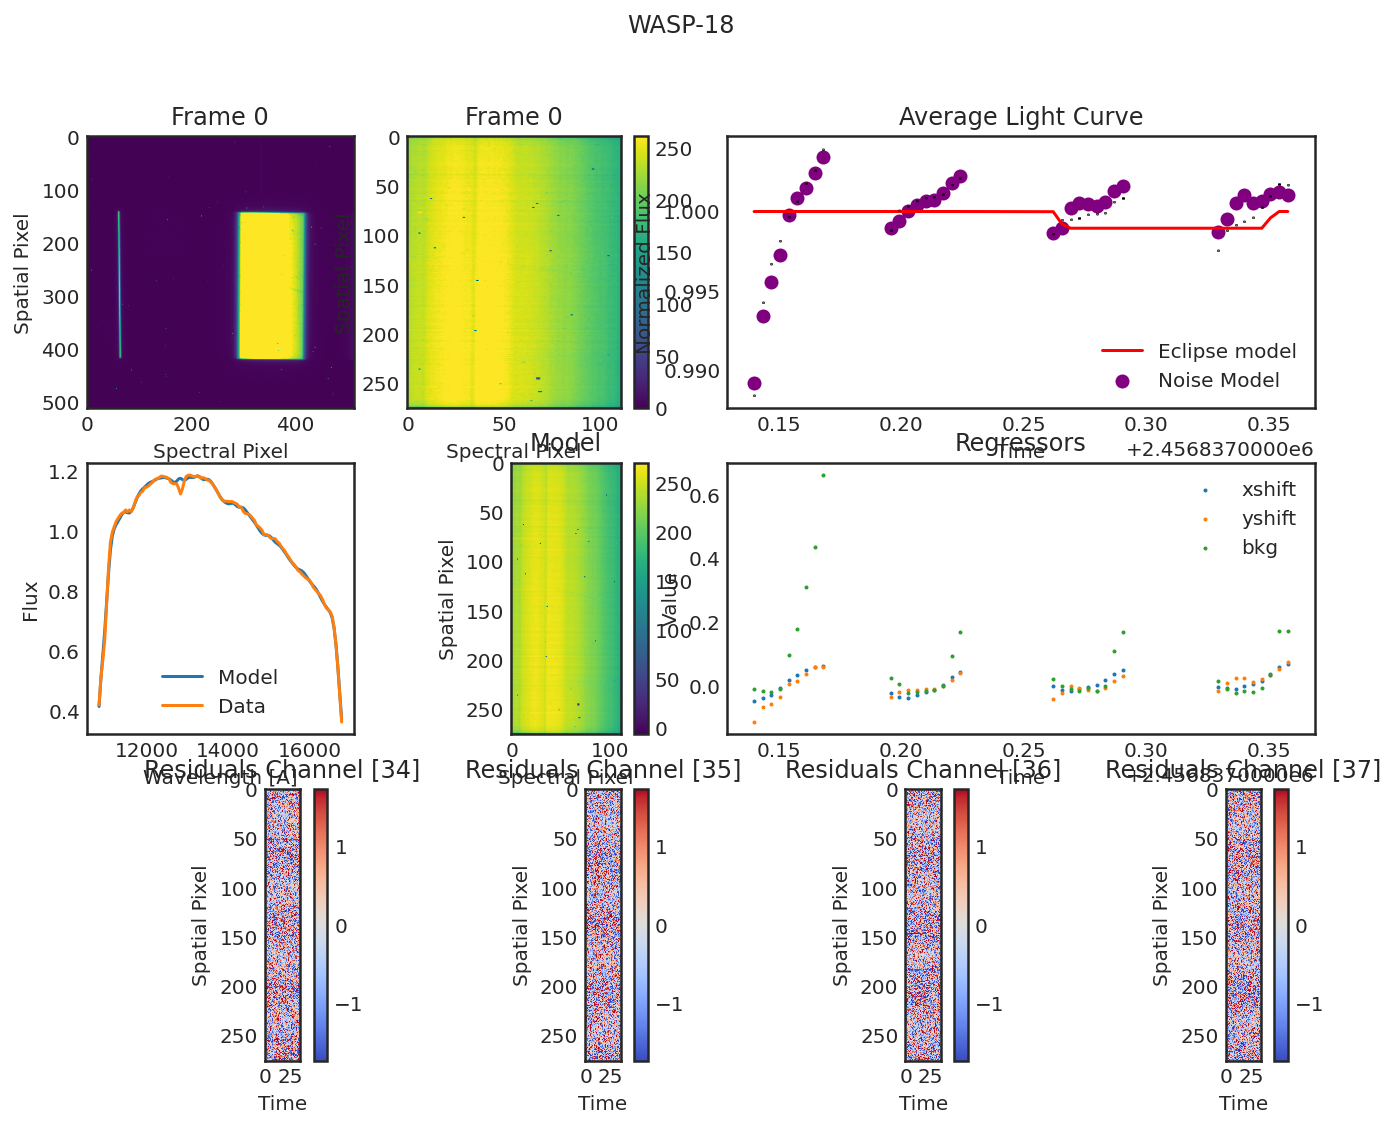

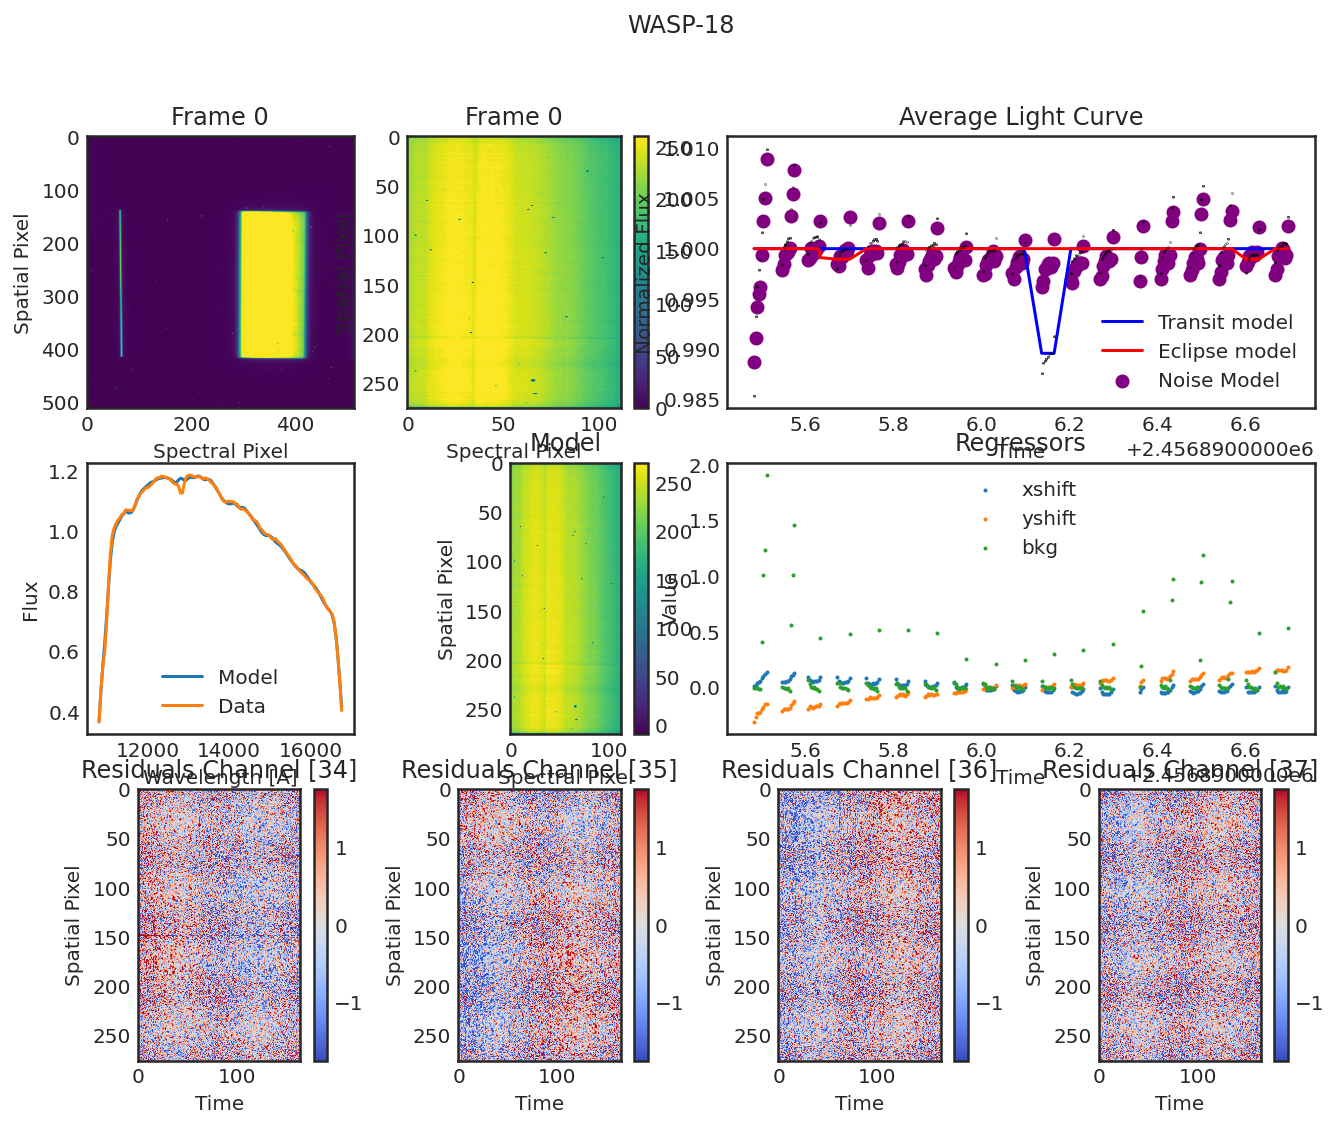

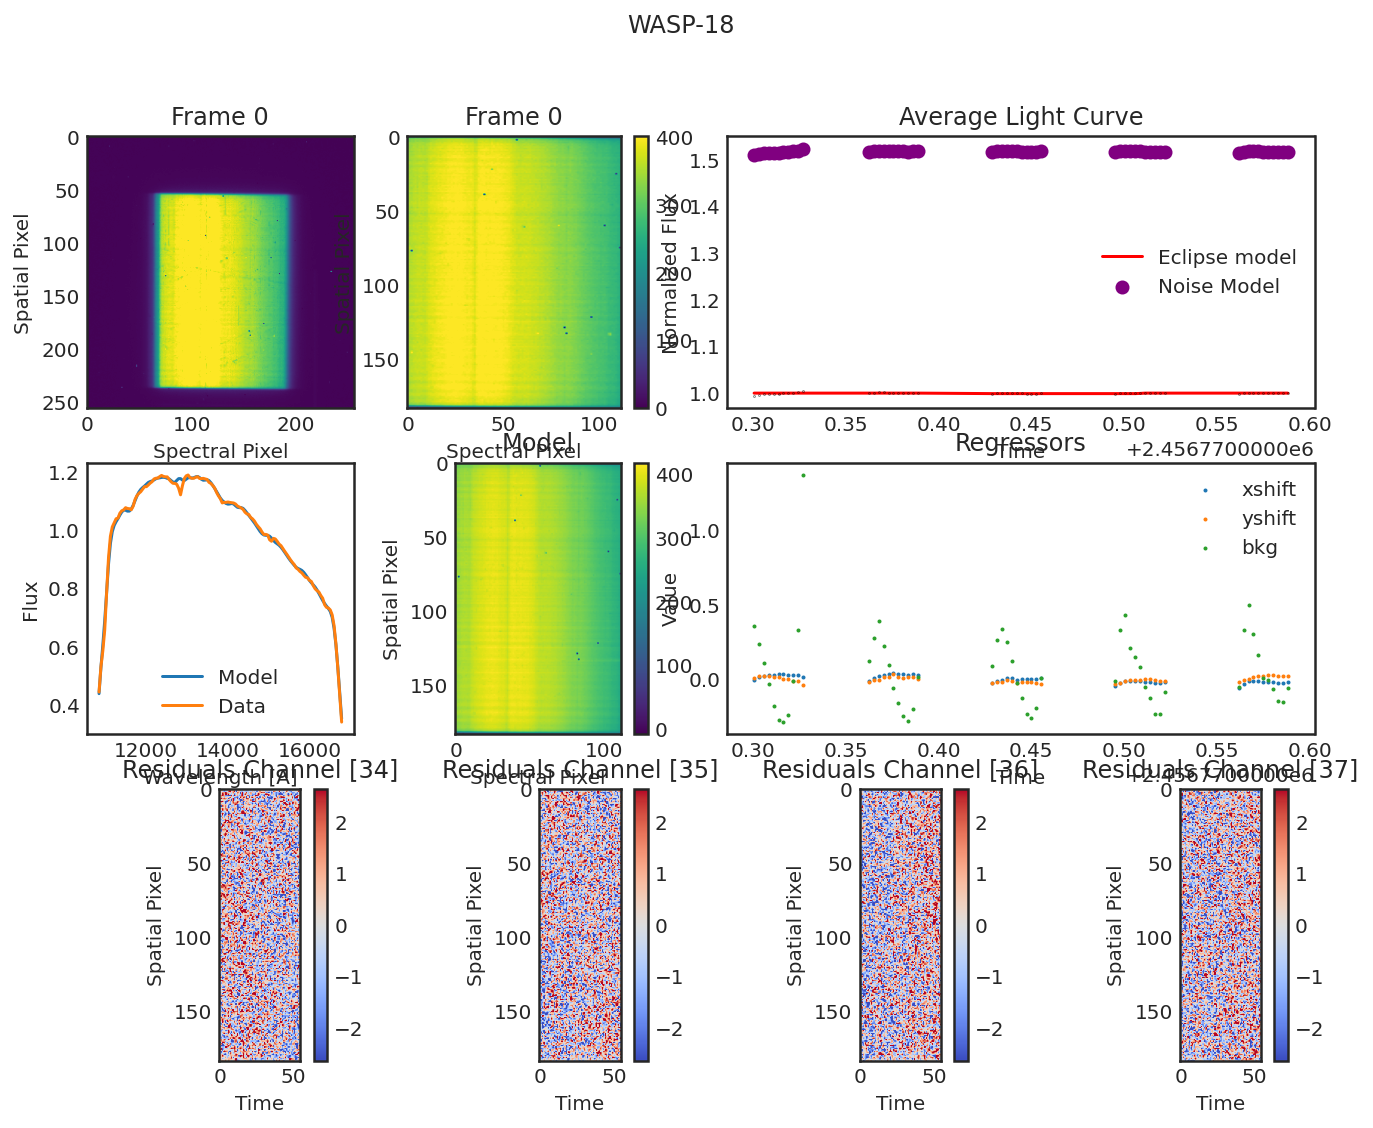

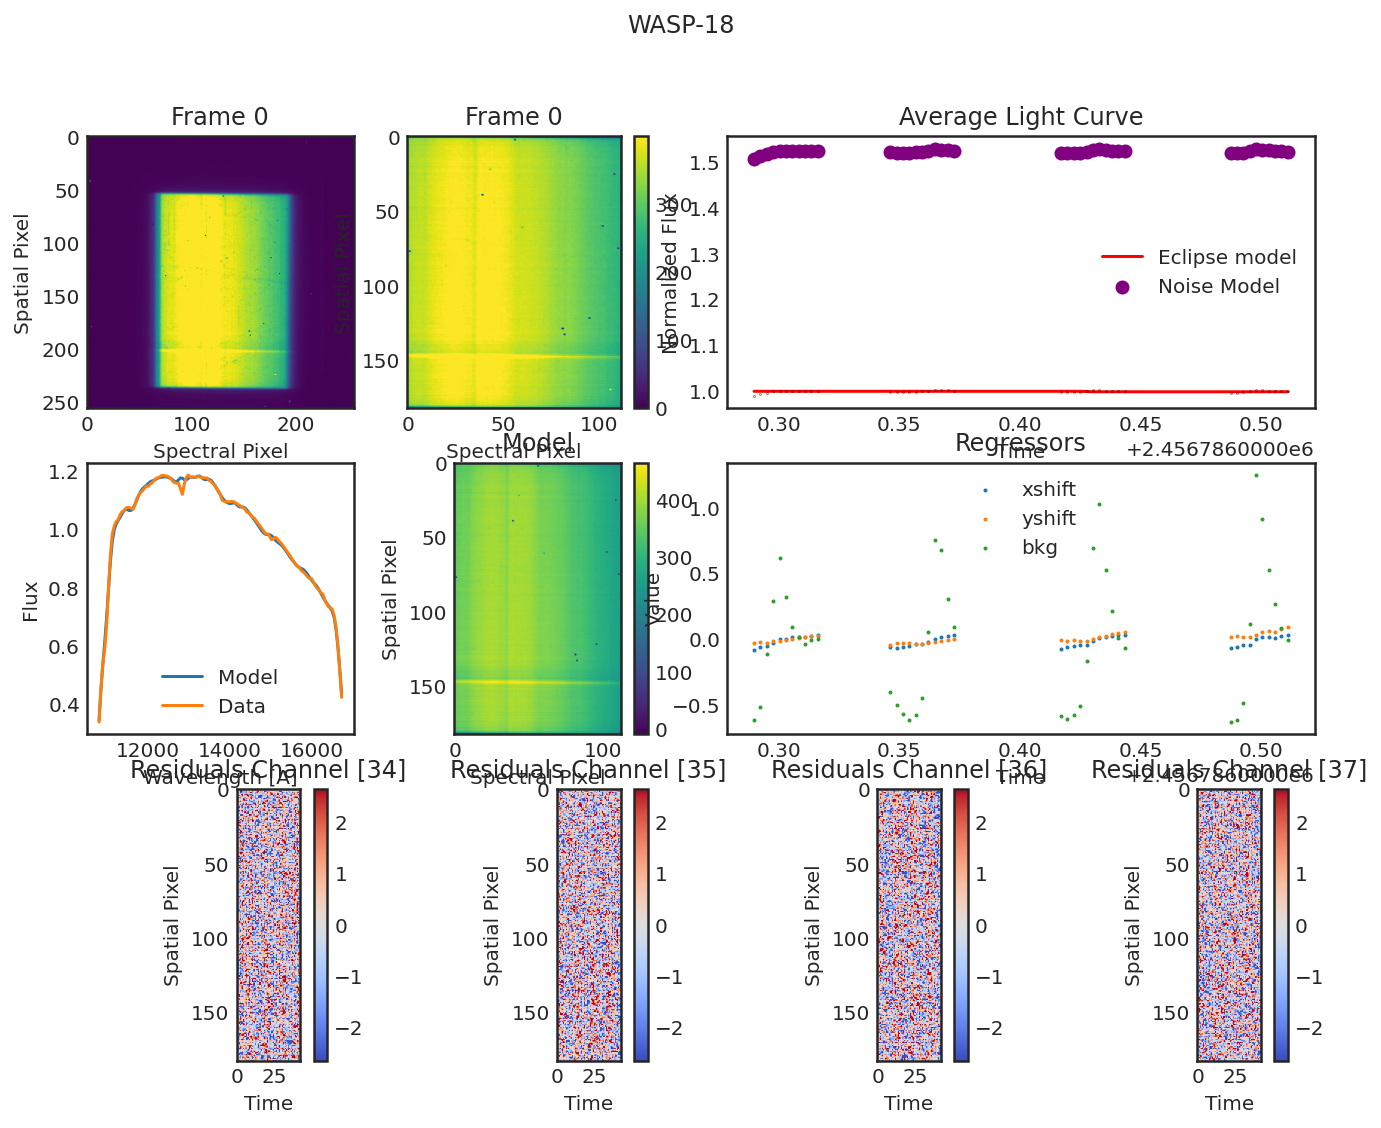

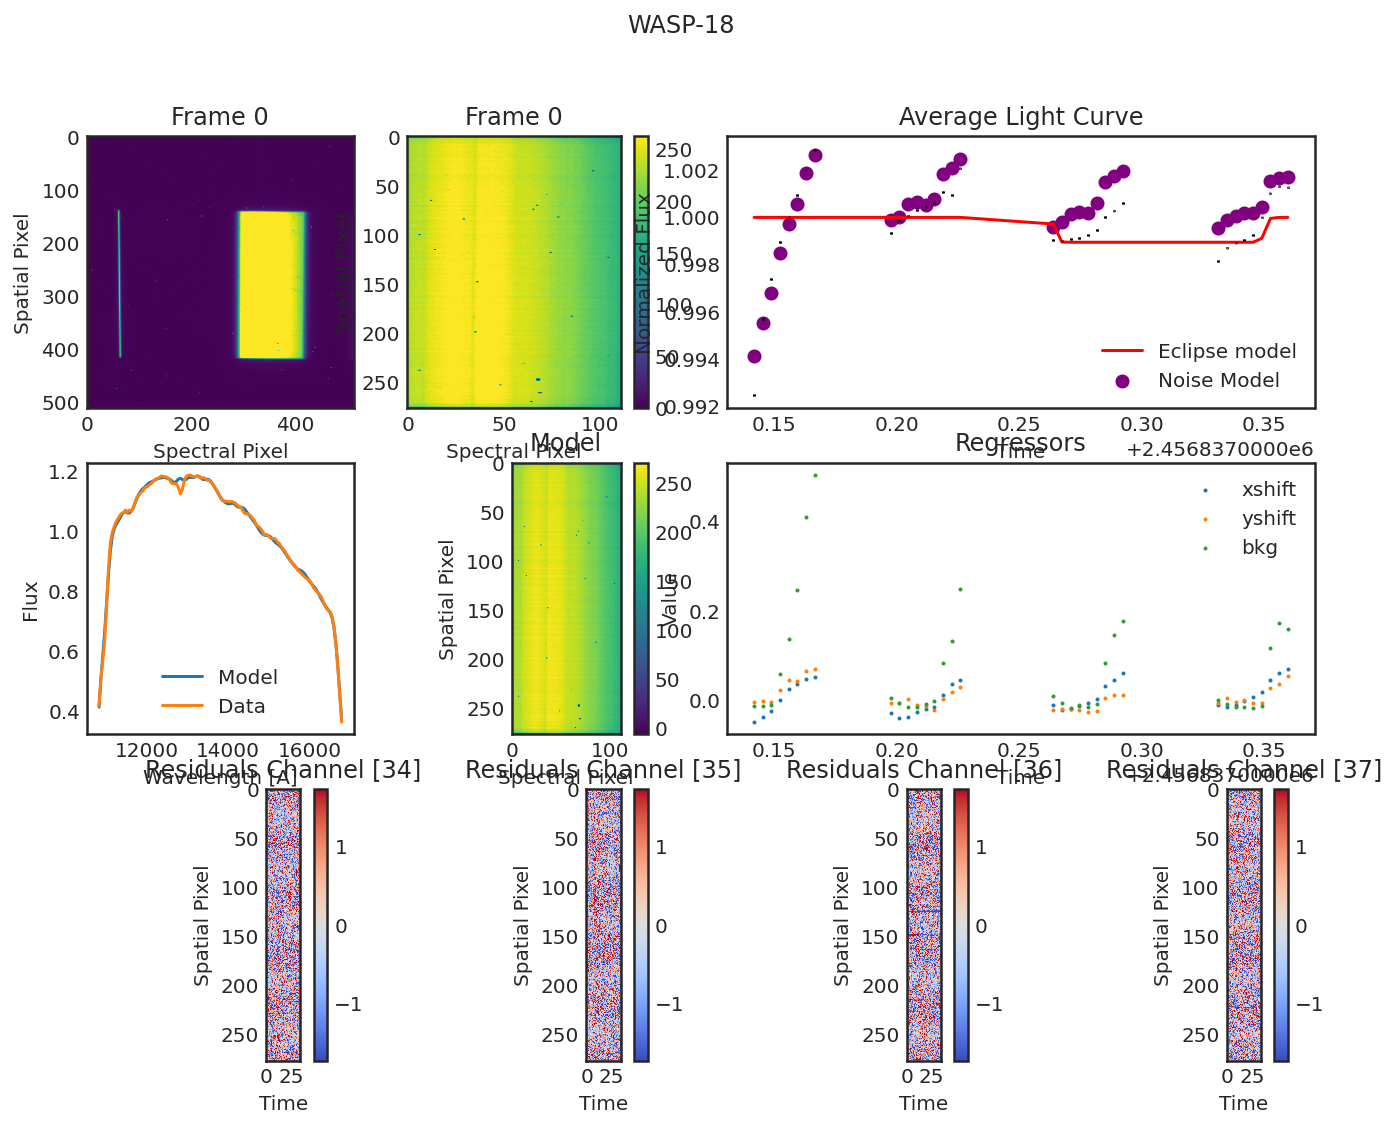

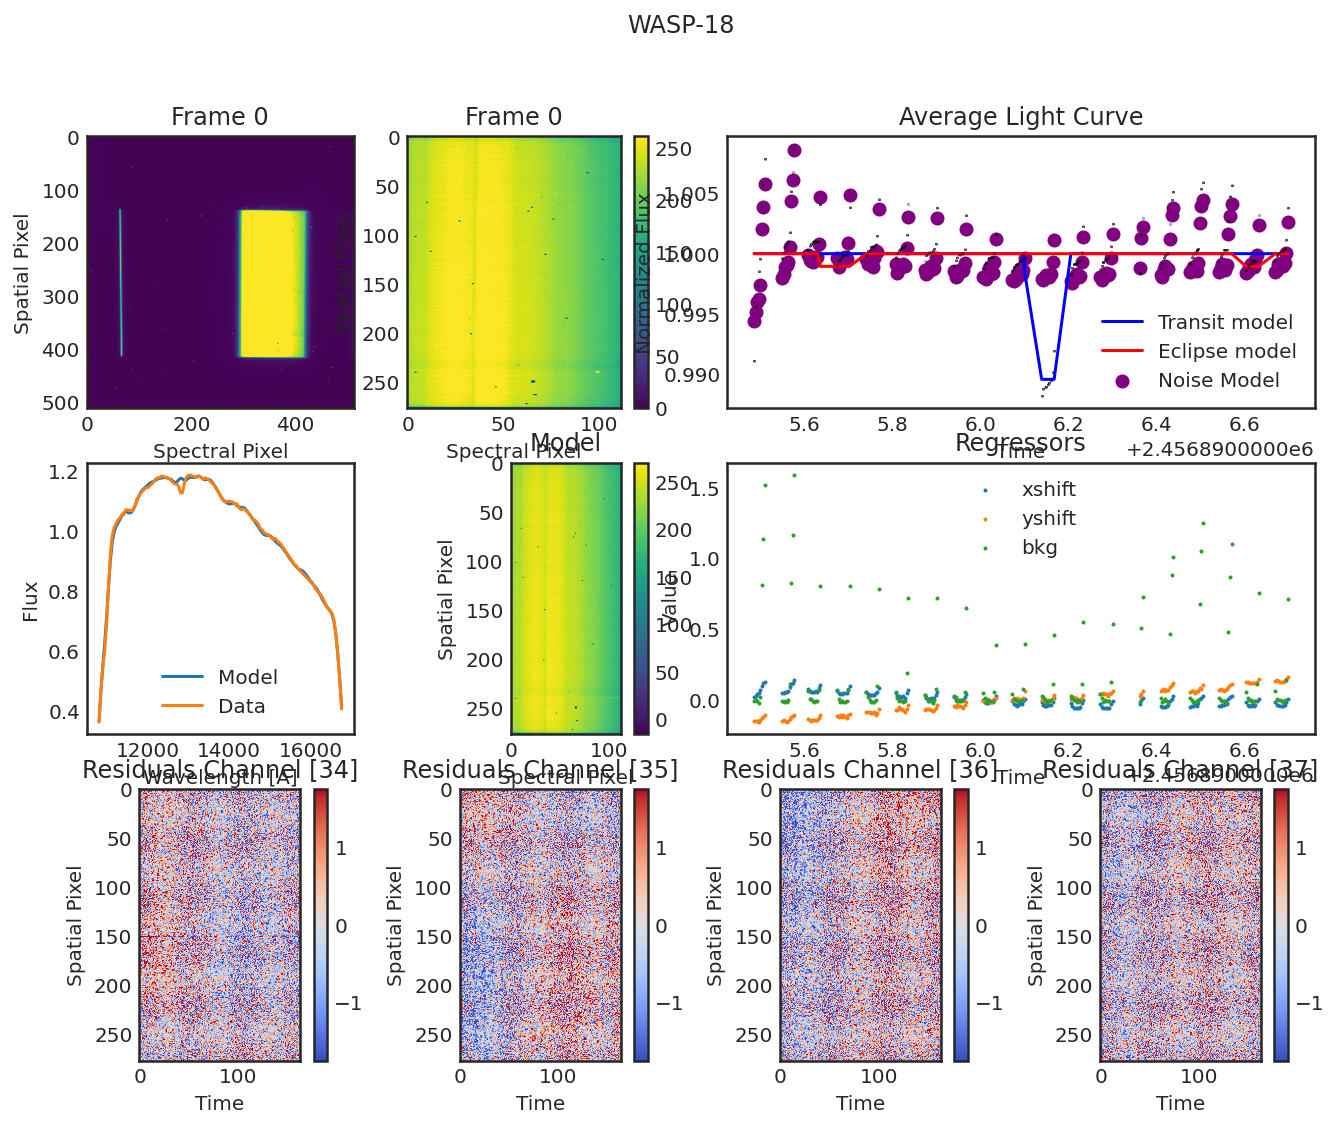

In [15]:
for visit in obs:
    visit.diagnose();
    plt.show();